In [3]:
import pandas as pd

df = pd.read_csv("active_occ_licenses_2025.csv")

print(df.shape)
print(df.columns.tolist())
df.head()

(10896, 20)
['BusinessAddress', 'BusinessName', 'BusinessPhone', 'BusinessStartDate', 'BusinessType', 'BusinessLicenseNumber', 'City', 'OwnerName', 'State', 'StreetDirection', 'StreetName', 'StreetNumber', 'StreetSuffix', 'Suite', 'Zip', 'LocationX', 'LocationY', 'Latitude', 'Longitude', 'Location']


,BusinessAddress,BusinessName,BusinessPhone,BusinessStartDate,BusinessType,BusinessLicenseNumber,City,OwnerName,State,StreetDirection,StreetName,StreetNumber,StreetSuffix,Suite,Zip,LocationX,LocationY,Latitude,Longitude,Location
0,4532 MAGAZINE ST,OCTAVIA ART AND FILM,504-616-6202,2008-03-14,Art Dealers,102680731,NEW ORLEANS,PAMELA M BRYAN,LA,NaN,MAGAZINE,4532,ST,NaN,70115-1543,3670385.57,518674.04,29.920506,-90.103601,POINT (-90.10360111114565 29.92050622841199)
1,24740 MILL VALLEY WAY,ALLOHN DESIGNS,NaN,2018-05-14,Special Events-Other (Vendor),105032410,CARSON,AGBENYA ALLOHN,CA,NaN,MILL VALLEY,24740,WAY,NaN,90745-6454,0.00,0.00,0.000000,0.000000,POINT (0 0)
2,2555 VALENCE ST,LOUANGER,(503) 867-6923,2025-02-01,Bed & Breakfast Inns,106124978,NEW ORLEANS,LOUANGER,LA,NaN,VALENCE,2555,ST,NaN,70115-6341,3669444.11,524212.50,29.935763,-90.106386,POINT (-90.10638567129016 29.935762975538836)
3,650 S ROCHEBLAVE ST,NOLA FROZEN TIME PHOTOGRAPHY,(504) 892-3220,2025-03-27,"Photography Studios, Portrait",106022854,NEW ORLEANS,NOLA FROZEN TIME PHOTOGRAPHY L,LA,S,ROCHEBLAVE,650,ST,NaN,70119-7439,3674709.28,532565.42,29.958575,-90.089477,POINT (-90.0894771646702 29.958574674015836)
4,3317 MAGAZINE ST,A VARGAS BODY SHOP,504-891-2606,1980-02-03,"Automotive Body, Paint & Interior Repair & Mai...",101117693,NEW ORLEANS,A VARGAS BODY SHOP INC,LA,NaN,MAGAZINE,3317,ST,NaN,70115-2410,3675193.08,519773.31,29.923386,-90.088388,POINT (-90.08838832801506 29.923386122945704)


In [2]:
df['BusinessStartDate'] = pd.to_datetime(df['BusinessStartDate'], errors='coerce')

Businesses Started by Year

In [3]:
df['BusinessStartYear'] = df['BusinessStartDate'].dt.year

df['BusinessStartYear'].value_counts().sort_index()

BusinessStartYear
1900     10
1937      1
1952      1
1958      1
1962      1
       ... 
2022    549
2023    649
2024    669
2025    914
2026      2
Name: count, Length: 69, dtype: int64

Visualization of Businesses Starting Over Time

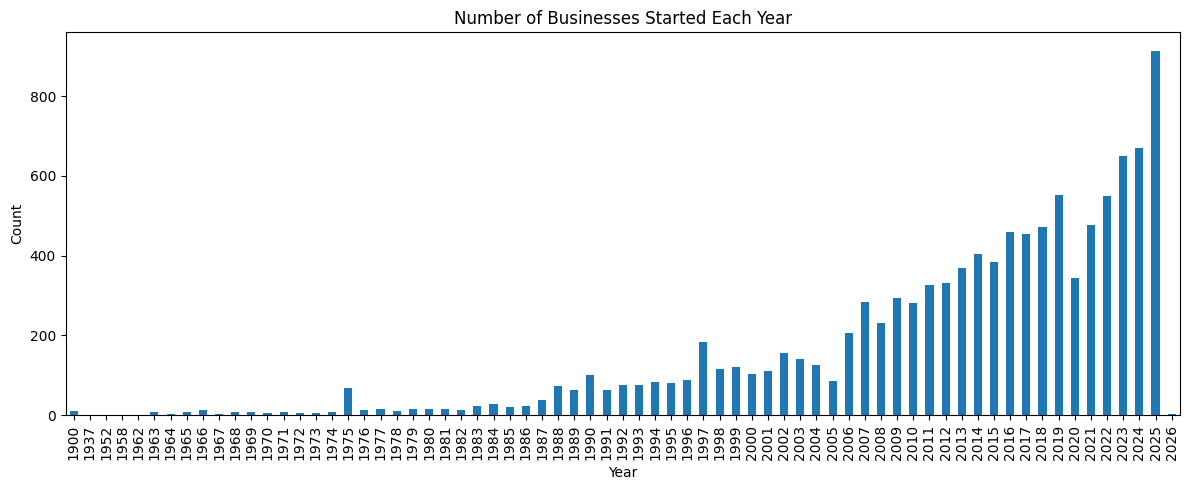

In [4]:
import matplotlib.pyplot as plt

df['BusinessStartYear'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('Number of Businesses Started Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Recent Years: 2000 onward 

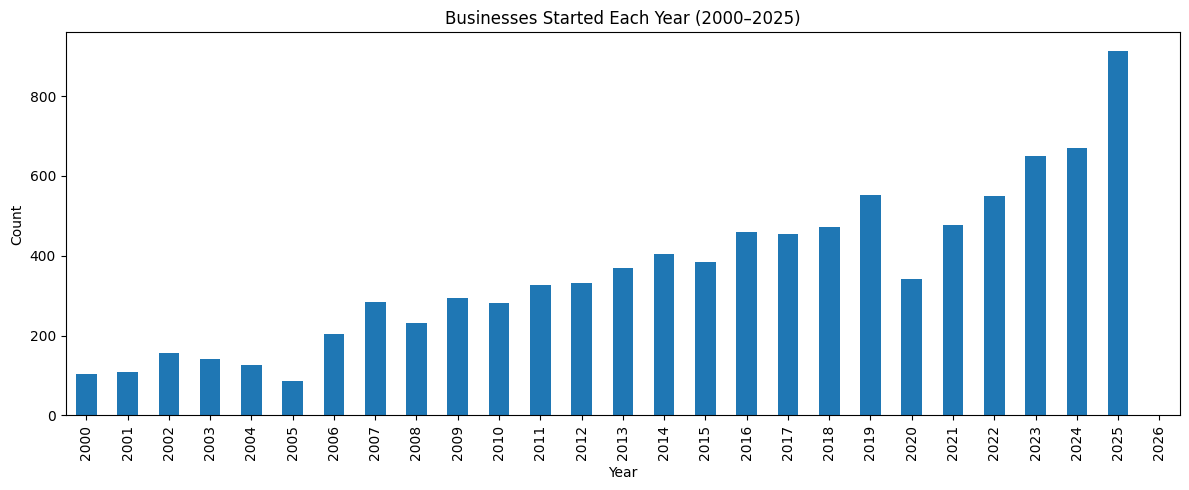

In [7]:
recent = df[df['BusinessStartYear'] >= 2000]

recent['BusinessStartYear'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))

plt.title('Businesses Started Each Year (2000–2025)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("business_starts_trend.png")
plt.show()

In [6]:
plt.savefig("business_starts_trend.png")

<Figure size 640x480 with 0 Axes>

In [4]:
for col in df.columns:
    sample_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "No data"
    print(f"- **{col}**: Example value → {sample_value}")

- **BusinessAddress**: Example value → 4532 MAGAZINE ST
- **BusinessName**: Example value → OCTAVIA ART AND FILM
- **BusinessPhone**: Example value → 504-616-6202
- **BusinessStartDate**: Example value → 2008-03-14
- **BusinessType**: Example value → Art Dealers
- **BusinessLicenseNumber**: Example value → 102680731
- **City**: Example value → NEW ORLEANS
- **OwnerName**: Example value → PAMELA M BRYAN
- **State**: Example value → LA
- **StreetDirection**: Example value → S
- **StreetName**: Example value → MAGAZINE
- **StreetNumber**: Example value → 4532
- **StreetSuffix**: Example value → ST
- **Suite**: Example value → 207
- **Zip**: Example value → 70115-1543
- **LocationX**: Example value → 3670385.57
- **LocationY**: Example value → 518674.04
- **Latitude**: Example value → 29.92050622841199
- **Longitude**: Example value → -90.10360111114564
- **Location**: Example value → POINT (-90.10360111114565 29.92050622841199)


## Understanding the Dataset Columns

To better interpet the dataseet, this section provides descriptions of each column along with a sample value. This helps clarify the structure of the data before performing any analysis or cleaning. 

### Column Description

- **BusinessAddress**: Full street address of the buisness
  location. _e.g., "4532 MAGAZINE ST"_

---

- **BusinessName**: Registered name of the business.
  _e.g., "OCTAVIA ART AND FILM"_

---

- **BusinessPhone**: Business contact number.
  _e.g., "504-616-6202"_

---

- **BusinessStartDate**: Official start date of business
  operations. _e.g., "2008-03-14"_

---

- **BusinessType**: Classification of the business activity or
  industry. _e.g., "Art Dealers"_

---

- **BusinessLicenseNumber**: Unique license ID assigned by the city. _e.g., "102680731"_

---

- **City**: City where the business is registered.
  _e.g., "NEW ORLEANS"_

---

- **OwnerName**: Full name of the business owner.
  _e.g., "PAMELA M BRYAN"_

---

- **State**: State abbreviation.
  _e.g., "LA"_

---

- **StreetDirection**: Compass direction used in the street address. _e.g., "S"_

---

- **StreetName**: Name of the street without number or direction.
 _e.g., "MAGAZINE"_

---

- **StreetNumber**: Number portion of the address.
  _e.g., "4532"_

---

- **StreetSuffix**: Type of road or street abbreviation.
  _e.g., "ST"_

---

- **Suite**: Internal office or suite number, if applicable.
  _e.g., "207"_

---

- **Zip**: ZIP code including any extended digits.
  _e.g., "70115-1543"_

---

- **LocationX / LocationY**: Internal coordinate reference system
  values.

---

- **Lattitude / Longitude**: Georgraphic location of the business.
  _e.g., (29.0205, -99.1036)

---

- **Location**: GIS-style point reference for mapping.
  _e.g., "POINT (-90.1036 29.9205)"_